In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
import wordcloud
import textblob

In [4]:
text=pd.read_csv("case_review.txt",error_bad_lines=False)

In [5]:
text

,x
0,This is a best case I have ever purchased. Whe...
1,This is an awesome armour protection for samsu...
2,Amazing and durable product. Looking stylish 😎...
3,Wow amazing case. When I attached the case it ...
4,Cut 2 cut fix ... amazing to buy. Happy for th...
5,Exceptional quality and majestic.This black an...
6,I got the product delivered today (1st Jan 202...
7,Just got the cover and looks pretty awesome an...
8,This is an excellent back cover for mobile. It...
9,"This is an exact fit for Samsung M51, the cuts..."


In [8]:
text['x'] = text['x'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
text.head()

,x
0,this is a best case i have ever purchased. whe...
1,this is an awesome armour protection for samsu...
2,amazing and durable product. looking stylish 😎...
3,wow amazing case. when i attached the case it ...
4,cut 2 cut fix ... amazing to buy. happy for th...


In [10]:
text['x'] = text['x'].str.replace('[^\w\s]','')

In [11]:
text.head()

,x
0,this is a best case i have ever purchased when...
1,this is an awesome armour protection for samsu...
2,amazing and durable product looking stylish b...
3,wow amazing case when i attached the case it f...
4,cut 2 cut fix amazing to buy happy for the it...


In [12]:
stop= pd.read_csv('stop.txt')

In [13]:
text['x'] = text['x'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [14]:
text.head(10)

,x
0,this is best case i have ever purchased when g...
1,this is an awesome armour protection for samsu...
2,amazing and durable product looking stylish be...
3,wow amazing case when i attached the case it f...
4,cut 2 cut fix amazing to buy happy for the ite...
5,exceptional quality and majesticthis black and...
6,i got the product delivered today 1st jan 2021...
7,just got the cover and looks pretty awesome an...
8,this is an excellent back cover for mobile it ...
9,this is an exact fit for samsung m51 the cuts ...


In [15]:
high_freq = pd.Series(' '.join(text['x']).split()).value_counts()[:10]

In [16]:
high_freq

the      124
and       74
is        66
it        61
for       55
to        45
phone     44
this      37
good      34
i         34
dtype: int64

In [17]:
freq = list(high_freq.index)
text['x'] = text['x'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [18]:
low_freq = pd.Series(' '.join(text['x']).split()).value_counts()[-10:]

In [21]:
low_freq

us         1
bedding    1
range      1
top        1
users      1
working    1
son        1
package    1
couple     1
joints     1
dtype: int64

In [20]:
freq = list(low_freq.index)
text['x'] = text['x'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [22]:
text.head(10)

,x
0,best case have ever purchased when galaxy m51 ...
1,an awesome armour protection samsung m51 laser...
2,amazing durable product looking stylish better...
3,wow amazing case when attached case felt so be...
4,cut 2 cut fix amazing buy happy item paid can ...
5,exceptional quality majesticthis black grey mi...
6,got product delivered today 1st jan 2021 morni...
7,just got cover looks pretty awesome looks stur...
8,an excellent back cover mobile built m51 you c...
9,an exact fit samsung m51 cuts are damn precise...


In [23]:
from textblob import TextBlob

In [24]:
text['x'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    best case have ever purchased when galaxy may ...
1    an awesome armour protection samson may laser ...
2    amazing unable product looking stylish better ...
3    now amazing case when attached case felt so be...
4    cut 2 cut fix amazing buy happy item paid can ...
Name: x, dtype: object

In [25]:
TextBlob(text['x'][1]).words

WordList(['an', 'awesome', 'armour', 'protection', 'samsung', 'm51', 'laser', 'cutting', 'so', 'precise', 'looks', 'feels', 'premium', 'you', 'can', 'use', 'mobile', 'without', 'any', 'drop', 'worries', 'also', 'stand', 'at', 'back', 'helpful', 'be', 'used', 'as', 'mobile', 'stand', 'alternatively', 'can', 'also', 'be', 'used', 'as', 'ring', 'holder', 'magnetic', 'holder', 'works', 'perfectly', 'overall', 'cover', 'best', 'buy', 'with', 'these', 'many', 'added', 'advantages', 'at', 'an', 'affordable', 'price', 'bought', '250', 'dont', 'think', 'just', 'blindly', 'go', 'you', 'wont', 'regret'])

In [26]:
st = PorterStemmer()

In [27]:
text['x'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    best case have ever purchas when galaxi m51 la...
1    an awesom armour protect samsung m51 laser cut...
2    amaz durabl product look stylish better than o...
3    wow amaz case when attach case felt so best fi...
4    cut 2 cut fix amaz buy happi item paid can go ...
Name: x, dtype: object

In [28]:
from textblob import Word

In [29]:
text['x'] = text['x'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [30]:
text.head(10)

,x
0,best case have ever purchased when galaxy m51 ...
1,an awesome armour protection samsung m51 laser...
2,amazing durable product looking stylish better...
3,wow amazing case when attached case felt so be...
4,cut 2 cut fix amazing buy happy item paid can ...
5,exceptional quality majesticthis black grey mi...
6,got product delivered today 1st jan 2021 morni...
7,just got cover look pretty awesome look sturdy...
8,an excellent back cover mobile built m51 you c...
9,an exact fit samsung m51 cut are damn precise ...


In [31]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [32]:
afinn.head(10)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [33]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [35]:
import spacy

In [43]:
nlp = spacy.load('en_core_web_sm')

In [44]:
sentiment_lexicon = affinity_scores

In [47]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        text = nlp(text)
        for word in text:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [48]:
calculate_sentiment(text = 'amazing')

4

In [50]:
text['sentiment_value'] = text['x'].apply(calculate_sentiment)

In [51]:
text['word_count'] = text['x'].str.split().apply(len)
text['word_count'].head(10)

0    58
1    66
2    14
3    36
4    40
5    23
6    67
7    70
8    49
9    42
Name: word_count, dtype: int64

In [55]:
text.sort_values(by='sentiment_value').tail(15)

,x,sentiment_value,word_count
1,an awesome armour protection samsung m51 laser...,7,66
39,well product sturdy in design fit perfectly it...,7,46
2,amazing durable product looking stylish better...,7,14
48,accurate fitting excellent product amazing pac...,7,16
27,product of very quality precisely designed mat...,8,19
41,like innovation with product small stand in ba...,8,19
47,really an awesome armour protection samsung m5...,9,33
8,an excellent back cover mobile built m51 you c...,10,49
49,just excellent sturdy but not heavy suit m51 w...,11,17
32,one of best fitting looking cover look super c...,11,30


In [56]:
text['sentiment_value'].describe()

count    59.000000
mean      4.440678
std       4.910479
min      -3.000000
25%       1.000000
50%       4.000000
75%       7.000000
max      20.000000
Name: sentiment_value, dtype: float64

In [58]:
text[text['sentiment_value']<=0].head(10)

,x,sentiment_value,word_count
20,just go extremely well cut out hole access fin...,-1,15
25,seller took 67 week deliver product cover cons...,-2,30
26,go itit look premiumcutouts are so meticulous ...,-2,21
33,it an armour your after you can be tension fre...,-3,18
36,brought 249 value money quality feel rubber ne...,0,11
37,waste product doesnt last long waste of money ...,-2,21
44,quite sturdy my fell down once but nothing hap...,0,21
45,value money durable sturdy,0,4
46,product amazinggiving protection of correct si...,-2,31
52,magnet not,0,2


In [59]:
text['index']=range(0,len(text))

C:\Users\Sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

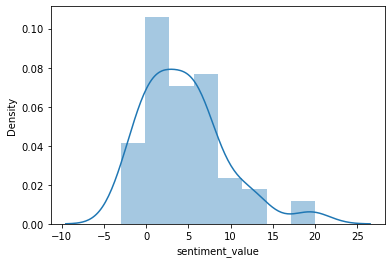

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(text['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

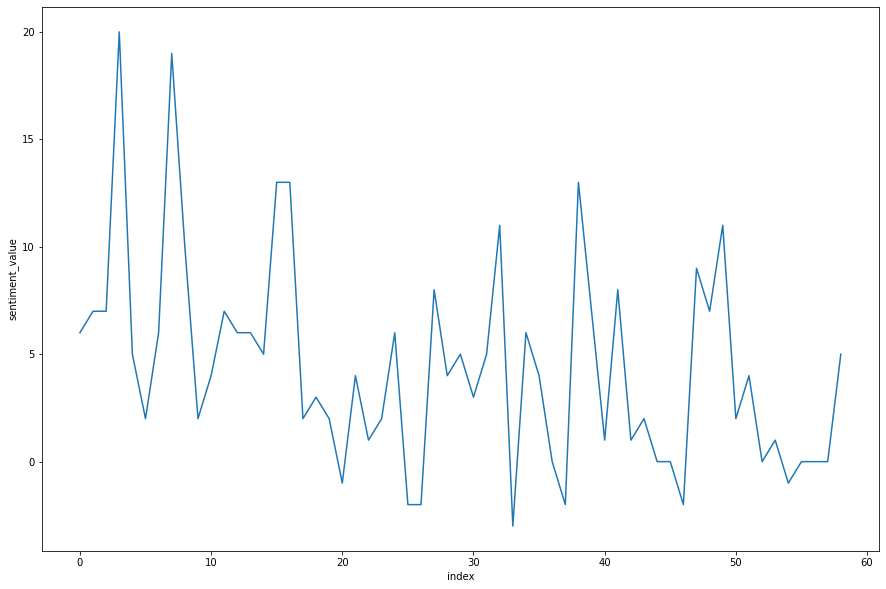

In [61]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=text)

<AxesSubplot:title={'center':'text sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

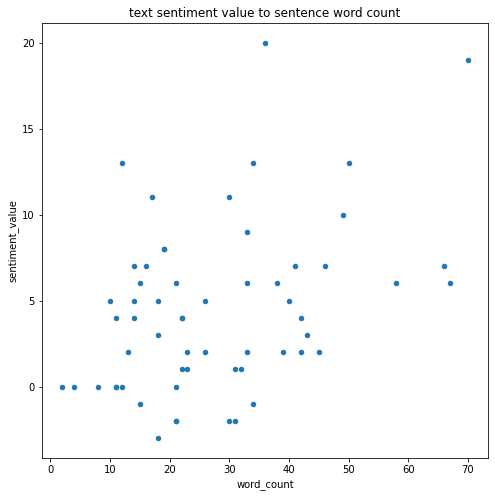

In [62]:
text.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='text sentiment value to sentence word count')